In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
fund_config = pd.read_csv('fund_config.csv')
fund_ratios = pd.read_csv('fund_ratios.csv', thousands=',')
bond_ratings = pd.read_csv('bond_ratings.csv', thousands=',')
fund_allocations = pd.read_csv('fund_allocations.csv', thousands=',') # ID
fund_specs = pd.read_csv('fund_specs.csv', thousands=',')
other_specs = pd.read_csv('other_specs.csv', thousands=',')
return_3year = pd.read_csv('return_3year.csv', thousands=',')
return_5year = pd.read_csv('return_5year.csv', thousands=',')
return_10year = pd.read_csv('return_10year.csv', thousands=',')
fund_allocations.rename(columns={'id': 'tag'}, inplace=True)

data = fund_config.merge(fund_ratios, on='fund_id',suffixes=('_left', '_right') )
data = data.merge(bond_ratings, on='tag',suffixes=('_left', '_right'))
data = data.merge(fund_allocations, on='tag',suffixes=('_left', '_right'))
data = data.merge(fund_specs, on='tag',suffixes=('_left', '_right'))
data = data.merge(other_specs, on='tag',suffixes=('_left', '_right'))
data = data.merge(return_3year, on='tag',suffixes=('_left', '_right'))
data = data.merge(return_5year, on='tag',suffixes=('_left', '_right'))
data = data.merge(return_10year, on='fund_id',suffixes=('_left', '_right'))

data['greatstone_rating'] = data.apply(
    lambda row: row['greatstone_rating_left'],
    axis=1
)

data.drop(['greatstone_rating_left', 'greatstone_rating_right', 'tag'], axis=1, inplace=True)

In [3]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [4]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(data)
 
print('Duplicate Columns are as follows:')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows:
Column name :  pb_ratio_right
Column name :  3_months_return_category
Column name :  ps_ratio_right
Column name :  pc_ratio_right
Column name :  pe_ratio_right
Column name :  mmc_right
Column name :  fund_return_3years_right


In [6]:
data.head()

,category,parent_company,fund_id,fund_name,fund_ratio_net_annual_expense,pb_ratio,ps_ratio,mmc,pc_ratio,pe_ratio,bb_rating,us_govt_bond_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,investment_class,currency,total_assets,yield,inception_date,fund_size,return_ytd,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,greatstone_rating
0,Energy Limited Partnership,DWS,264614c6-5ac3-4146-ba26-1674b136cb40,DWS RREEF MLP & Energy Infrastructure Fund - C...,1.44,1.71,1.31,19857.41,5.91,14.51,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,Value,USD,1.185000e+07,5.57,2015-02-02,Large,20.19,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,-5.78,18.40,NaN,0.00,0.00,16.14,98.81,27.30,NaN,NaN,4.24,NaN,-12.23,-3.31,1.75,-34.98,4.12,0.00,0.00,NaN,NaN,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,-0.04,0.01,0.00,0.42,7.36,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30,NaN
1,Large Growth,Janus Henderson,f5ad58c2-fdea-4087-8678-e04744f89f90,Janus Henderson Research Fund Class N,0.58,5.30,3.38,72347.03,15.95,18.88,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,Growth,USD,1.397000e+10,0.42,2012-05-30,Large,16.79,10.00,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,27.67,12.18,5.60,0.00,0.00,1.64,99.90,3.23,NaN,NaN,14.39,NaN,-2.62,26.39,1.06,3.60,2.33,0.00,0.00,NaN,33.92,12.20,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,0.01,0.01,0.01,0.84,15.35,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94,3.0
2,Large Growt

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 122 entries, category to greatstone_rating
dtypes: float64(114), object(8)
memory usage: 23.5+ MB


In [8]:
categorical_features = data.select_dtypes(include=['object']).columns
print(f'\nCategorical Features: {categorical_features}\n')


Categorical Features: Index(['category', 'parent_company', 'fund_id', 'fund_name',
       'investment_class', 'currency', 'inception_date', 'fund_size'],
      dtype='object')



In [31]:
data['investment_class'].value_counts()

Blend     10298
Growth     6671
Value      6551
Name: investment_class, dtype: int64

In [9]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print(f'\n Numeric Features: {numeric_features}\n')


 Numeric Features: Index(['fund_ratio_net_annual_expense', 'pb_ratio', 'ps_ratio', 'mmc',
       'pc_ratio', 'pe_ratio', 'bb_rating', 'us_govt_bond_rating',
       'below_b_rating', 'others_rating',
       ...
       '10yrs_treynor_ratio_fund', '10_years_return_mean_annual_category',
       '10yrs_treynor_ratio_category', '10_years_return_fund',
       '10_years_alpha_category', '10_years_beta_category',
       '10years_category_std', '10_years_return_mean_annual_fund',
       '10_years_return_category', 'greatstone_rating'],
      dtype='object', length=114)



### Missing Value Treatment

In [22]:
pd.set_option('display.max_rows', 200)

null_counts = data.isnull().sum()
null_columns = null_counts[null_counts > 0].sort_values(ascending = False)
null_columns
# null_columns.loc[lambda s : s > 5000]

maturity_bond                             16907
duration_bond                             15126
2010_return_fund                          12262
2010_return_category                      11538
2011_return_fund                          11163
2011_return_category                      10533
2012_fund_return                           9985
2012_return_category                       9124
10yrs_sharpe_ratio_fund                    8584
10years_fund_std                           8584
10_years_alpha_fund                        8584
10years_fund_r_squared                     8584
10_years_beta_fund                         8584
10yrs_treynor_ratio_fund                   8584
10_years_return_mean_annual_fund           8584
2013_return_fund                           8538
2013_category_return                       7637
2014_return_fund                           7206
2014_category_return                       6183
2015_return_fund                           5688
greatstone_rating                       

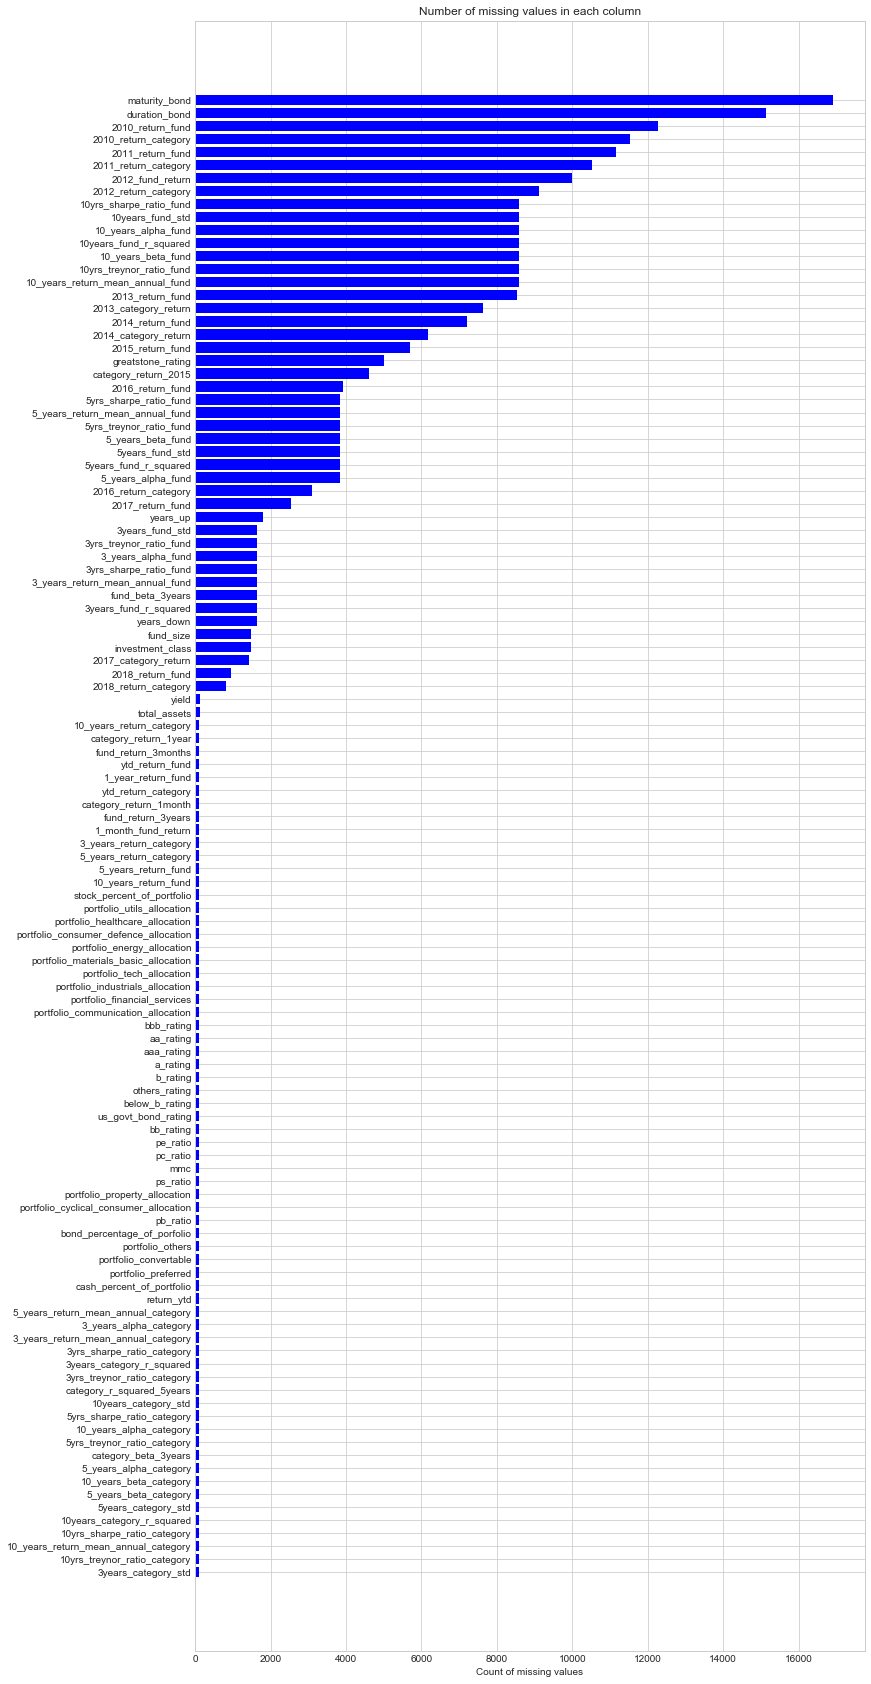

In [24]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [32]:
test_data = pd.DataFrame(data[data['greatstone_rating'].isnull()])

train_data = data.drop(data[data['greatstone_rating'].isnull()].index.tolist(), axis=0)

In [33]:
train_data.shape

(20000, 122)

In [34]:
test_data.shape

(5000, 122)

In [38]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

X = train_data.drop('greatstone_rating', axis=1)
y = train_data.greatstone_rating

y = label_binarizer.fit_transform(y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify = y)
X_train.shape

(16000, 121)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 18)

ValueError: could not convert string to float: 'High Yield Bond'